In [ ]:
!git clone https://github.com/robertopsouto/kfs2d_rna_mirror.git

In [1]:
%cd kfs2d_rna_mirror

/home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/kfs2d_rna_mirror

In [ ]:
!make

In [2]:
!./run-KFS2d.sh 1 10 10 100 10 2 2 0.1 10

 ./KFS2d 1 10 10 100 10 2 2 0.1 10
 command_argument_count():            9
 freqObsX: 2     
 freqObsY: 2     
 percNoise: 0.1   
 neuronNumber: 10    
 SALVOU CONDICAO INICIAL - qInitialCondExpA.out
 SALVOU RESULTADO DA INTEGRACAO DO MODELO - qModelExpA.out
 Gerou o ruido que sera adicionado ao modelo - gerando as observacoes 
 SALVOU AS OBSERVACOES -- MODELO + Rand - qObservExpA.out
 Inicializou a freqAssim
 Inicializando as matrizes 1
 Inicializando as matrizes 2
 Inicializando as matrizes 3
 Inicializando as matrizes 4
 Inicializando as matrizes 5
 Inicializando as matrizes 6
 Inicializando as matrizes 7
 Inicializando as matrizes 8
 Inicializando as matrizes 9
 Inicializando as matrizes 10
 Completando as matrizes com valores apropriados
 FK Assimilation cycle - timeStep          10
 Primeira chamada dgemm
 Passou pela equacao 3.60
 Segunda chamada dgemm
 Terceira chamada dgemm
 Invertendo matriz
 Store A in Ainv
 Ainv = A
 call DGETRF
 Quarta chamada dgemm
 Quinta chamada dgemm
 

In [3]:
%cd resultados/percNoise_0.1/output-gridX_10-gridY_10-timestep_100-freqObsT_10-freqObsX_2-freqObsY_2/training/

/home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/kfs2d_rna_mirror/resultados/percNoise_0.1/output-gridX_10-gridY_10-timestep_100-freqObsT_10-freqObsX_2-freqObsY_2/training

In [4]:
%--------------------------------------------------------------------------
% programa para normalizar os valores da variavel para usar no treinamento da RNA/MPCA
%--------------------------------------------------------------------------
clear all;
close all; clc;
%-----------------------
%leitura dos dados
%-----------------------
qM = load('qModelExpA.out');
qO = load('qObservExpA.out');
qA = load('qAnalysisExpA.out');

valNormInf=-1.0;
valNormSup=+1.0;

qM_norm=(max(qM)*valNormInf-min(qM)*valNormSup+qM*(valNormSup-valNormInf))/(max(qM)-min(qM));
qO_norm=(max(qO)*valNormInf-min(qO)*valNormSup+qO*(valNormSup-valNormInf))/(max(qO)-min(qO));
qA_norm=(max(qA)*valNormInf-min(qA)*valNormSup+qA*(valNormSup-valNormInf))/(max(qA)-min(qA));

[l,n]=size(qM);
pontos_por_ciclo=25;
ciclos=n/pontos_por_ciclo;

parc1 = floor(0.60*ciclos)*pontos_por_ciclo;
parc2 = ceil(0.10*ciclos)*pontos_por_ciclo;
parc3 = n - parc1 - parc2;

train_range=parc1;
valid_init=train_range+1;
valid_end=train_range+parc2;
gen_init=valid_end+1;
gen_end=valid_end+parc3;;

fileID = fopen('x.txt','w');
fprintf(fileID,'      %8.5f',qM_norm(1:train_range));
fprintf(fileID,'\n');
fclose(fileID);
fileID = fopen('x.txt','a');
fprintf(fileID,'      %8.5f',qO_norm(1:train_range));
fprintf(fileID,'\n');
fclose(fileID);
fileID = fopen('y.txt','w');
fprintf(fileID,'      %8.5f',qA_norm(1:train_range));
fprintf(fileID,'\n');
fclose(fileID);

fileID = fopen('x_valid.txt','w');
fprintf(fileID,'      %8.5f',qM_norm(valid_init:valid_end));
fprintf(fileID,'\n');
fclose(fileID);
fileID = fopen('x_valid.txt','a');
fprintf(fileID,'      %8.5f',qO_norm(valid_init:valid_end));
fprintf(fileID,'\n');
fclose(fileID);
fileID = fopen('y_valid.txt','w');
fprintf(fileID,'      %8.5f',qA_norm(valid_init:valid_end));
fprintf(fileID,'\n');
fclose(fileID);

fileID = fopen('x_gen.txt','w');
fprintf(fileID,'      %8.5f',qM_norm(gen_init:gen_end));
fprintf(fileID,'\n');
fclose(fileID);
fileID = fopen('x_gen.txt','a');
fprintf(fileID,'      %8.5f',qO_norm(gen_init:gen_end));
fprintf(fileID,'\n');
fclose(fileID);
fileID = fopen('y_gen.txt','w');
fprintf(fileID,'      %8.5f',qA_norm(gen_init:gen_end));
fprintf(fileID,'\n');
fclose(fileID);


In [10]:
parc1

parc1 = 150


In [11]:
parc2

parc2 = 25


In [12]:
parc3

parc3 = 75


In [5]:
!ls -ltr

total 48
-rw-rw-r-- 1 rpsouto rpsouto   71 abr 13 08:16 README.md
-rw-rw-r-- 1 rpsouto rpsouto 2235 abr 13 08:16 normalizar.m
-rw-rw-r-- 1 rpsouto rpsouto 4001 abr 13 08:34 qObservExpA.out
-rw-rw-r-- 1 rpsouto rpsouto 4001 abr 13 08:34 qModelExpA.out
-rw-rw-r-- 1 rpsouto rpsouto 4001 abr 13 08:34 qAnalysisExpA.out
-rw-rw-r-- 1 rpsouto rpsouto 4202 abr 13 08:35 x.txt
-rw-rw-r-- 1 rpsouto rpsouto 2101 abr 13 08:35 y.txt
-rw-rw-r-- 1 rpsouto rpsouto  702 abr 13 08:35 x_valid.txt
-rw-rw-r-- 1 rpsouto rpsouto  351 abr 13 08:35 y_valid.txt
-rw-rw-r-- 1 rpsouto rpsouto 2102 abr 13 08:35 x_gen.txt
-rw-rw-r-- 1 rpsouto rpsouto 1051 abr 13 08:35 y_gen.txt


In [6]:
%cd ../../../../../

/home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/kfs2d_rna_mirror/resultados

In [ ]:
!git clone https://github.com/scsr-inpe/mpca-ann.git

In [8]:
%cd mpca-ann

/home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/mpca-ann

In [ ]:
!make clean

In [ ]:
!make

In [9]:
!cp ../kfs2d_rna_mirror/resultados/percNoise_0.1/output-gridX_10-gridY_10-timestep_100-freqObsT_10-freqObsX_2-freqObsY_2/training/*.txt data/

In [13]:
%get parc1 --from Octave

In [15]:
%get parc2 --from Octave

In [16]:
%get parc3 --from Octave

In [17]:
%cd config/

/home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/mpca-ann/config

In [1]:
%cd /home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/mpca-ann/config

/home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/mpca-ann/config

In [3]:
!sed -i -e 's/NCLASSES=2000/NCLASSES=150/g' \
        -e 's/NCLASSESVALIDATION=600/NCLASSESVALIDATION=25/g' \
        -e 's/UPPER_HIDDEN_LAYERS=2/UPPER_HIDDEN_LAYERS=1/g' \
        -e 's/LOWER_FIRST_HIDDEN_LAYER=5/LOWER_FIRST_HIDDEN_LAYER=10/g' \
        -e 's/UPPER_FIRST_HIDDEN_LAYER=25/UPPER_FIRST_HIDDEN_LAYER=10/g' \
        -e 's/LOWER_ACTIVATION_FUNCTION=1/LOWER_ACTIVATION_FUNCTION=2/g' \
        -e 's/UPPER_ACTIVATION_FUNCTION=3/UPPER_ACTIVATION_FUNCTION=2/g' \
        configuration.ini

In [4]:
%cd ..

/home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/mpca-ann

In [5]:
!./runMPCA 4 2

make: Nothing to be done for 'all'.
************************************************************

                       Experiment   1                       

************************************************************

NFE (total):                 1000 of       1000
Best objective function value: 4.8960 x (10^ -2)
Number of hidden layers:  1
Neurons in hidden layer 1: 10
Activation function:  2
Alpha: 0.1681
Eta: 0.5473
                                                            
                                                            
************************************************************

                       Experiment   2                       

************************************************************

NFE (total):                 1000 of       1000
Best objective function value: 4.9295 x (10^ -2)
Number of hidden layers:  1
Neurons in hidden layer 1: 10
Activation function:  2
Alpha: 0.3790
Eta: 0.5416
                                                            

In [6]:
!./annMLP 4 2

           4
           2
         600
           2
           1
           1
          10
           0
           2
           1
          10
           0
           2
 ./output/ann3_1.out
   4.8772629999999997E-002
   5.1058350000000002E-002
 ./output/ann3_2.out
   4.8772629999999997E-002
   4.8753230000000002E-002


In [7]:
!cp output/ann3.best ../kfs2d_rna_mirror/data/

In [8]:
%cd ../kfs2d_rna_mirror/data/

/home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/kfs2d_rna_mirror

In [11]:
!./pesos_vies.sh ann3.best

In [12]:
!ls -ltr

total 28
-rw-rw-r-- 1 rpsouto rpsouto  40 abr 13 08:16 README.md
-rwxrwxr-x 1 rpsouto rpsouto 279 abr 13 08:16 pesos_vies.sh
-rw-rw-r-- 1 rpsouto rpsouto 688 abr 13 09:15 ann3.best
-rw-rw-r-- 1 rpsouto rpsouto 222 abr 13 09:19 wqcoExpA.dat
-rw-rw-r-- 1 rpsouto rpsouto 111 abr 13 09:19 bqcoExpA.dat
-rw-rw-r-- 1 rpsouto rpsouto 120 abr 13 09:19 wqcsExpA.dat
-rw-rw-r-- 1 rpsouto rpsouto  12 abr 13 09:19 bqcsExpA.dat


In [13]:
%cd ../

/home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/kfs2d_rna_mirror

In [15]:
!./run-KFS2d.sh 2 10 10 100 10 2 2 0.1 10

rm: não foi possível remover 'output/training/*.out': Arquivo ou diretório inexistente
 ./KFS2d 2 10 10 100 10 2 2 0.1 10
 command_argument_count():            9
 freqObsX: 2     
 freqObsY: 2     
 percNoise: 0.1   
 neuronNumber: 10    
 SALVOU CONDICAO INICIAL - qInitialCondExpA.out
 SALVOU RESULTADO DA INTEGRACAO DO MODELO - qModelExpA.out
 Gerou o ruido que sera adicionado ao modelo - gerando as observacoes 
 SALVOU AS OBSERVACOES -- MODELO + Rand - qObservExpA.out
 Inicializou a freqAssim
 Inicializando as matrizes 1
 Inicializando as matrizes 2
 Inicializando as matrizes 3
 Inicializando as matrizes 4
 Inicializando as matrizes 5
 Inicializando as matrizes 6
 Inicializando as matrizes 7
 Inicializando as matrizes 8
 Inicializando as matrizes 9
 Inicializando as matrizes 10
 Completando as matrizes com valores apropriados
 Normalizando os dados para RNA
 ANN Assimilation cycle - timeStep          10
 TUDO PRONTO PARA A RNA
 PASSAMOS PELA RNA
 ANN Assimilation time:    8.009999999

In [16]:
%cd resultados/percNoise_0.1/output-gridX_10-gridY_10-timestep_100-freqObsT_10-freqObsX_2-freqObsY_2/full/

/home/rpsouto/projetos/g-assimila/gitlab/g-assimila/shallow-water/kfs2d_rna_jupyter/kfs2d_rna_mirror/resultados/percNoise_0.1/output-gridX_10-gridY_10-timestep_100-freqObsT_10-freqObsX_2-freqObsY_2/full

ans = -9.5540


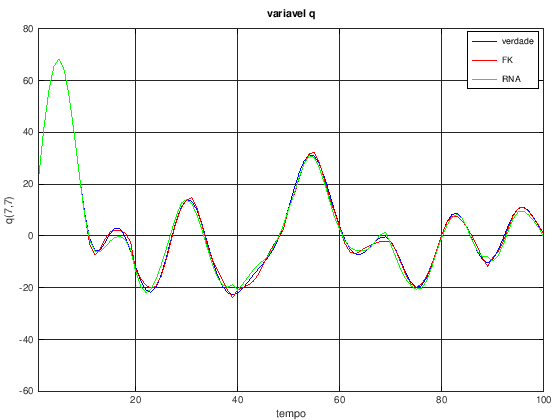

In [17]:
%--------------------------------------------------------------------------
% programa para plotar os graficos
%--------------------------------------------------------------------------
clear all;
close all; clc;
%-----------------------
%leitura dos dados
%-----------------------
qm = load('qModelExpA.out');
qa = load('qAnalysisExpA.out');
% dado da rede
qar = load('qAnalysisExpA_RNA.out');
%
ni = 10;
nj = ni;
nk = 100;
%
ninj = ni*nj;
p = 7; % ponto
%
% dado do modelo
qm3D = reshape(qm,ni,nj,nk);
qpm10 = qm3D(p,p,:);
qpm10v = qpm10(:);
%
%valor estimado pelo Filtro de Kalman
qafk3D = reshape(qa,ni,nj,nk);
qpa10 = qafk3D(p,p,:);
qpa10v = qpa10(:);
%
%estimado pela Rede Neural
 qr3D = reshape(qar,ni,nj,nk);
 qpr10 = qr3D(p,p,:);
 qpr10v = qpr10(:);
%
figure(1)
plot(qpm10v,'b','linewidth',0.5); hold on;
plot(qpa10v,'r','linewidth',0.5);
plot(qpr10v,'g','linewidth',0.5);
title('variavel q'); grid on;
xlabel('tempo');
ylabel('q(7,7)');
legend('verdade','FK','RNA')
axis([1 100 -60 80])
%print -depsc variavelqExpA.eps;
print -dpng -r240 variavelqExpA.png;

In [19]:
!ls -ltr

total 688
-rw-rw-r-- 1 rpsouto rpsouto     78 abr 13 08:16 README.md
-rw-rw-r-- 1 rpsouto rpsouto   1080 abr 13 08:16 fkFigura.m
-rw-rw-r-- 1 rpsouto rpsouto 160001 abr 13 08:34 qModelExpA.out
-rw-rw-r-- 1 rpsouto rpsouto 160001 abr 13 08:34 qObservExpA.out
-rw-rw-r-- 1 rpsouto rpsouto 160001 abr 13 08:34 qAnalysisExpA.out
lrwxrwxrwx 1 rpsouto rpsouto     37 abr 13 09:21 qAnalysisExpA_RNA.out -> qAnalysisExpA_RNA-neuronNumber_10.out
-rw-rw-r-- 1 rpsouto rpsouto 160001 abr 13 09:21 qAnalysisExpA_RNA-neuronNumber_10.out
-rw-rw-r-- 1 rpsouto rpsouto  38093 abr 13 09:24 variavelqExpA.png


![alt text](variavelqExpA.png)